In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")
import math
from scipy.stats import zscore, ks_2samp
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import shap
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df.duplicated().describe()

count     284807
unique         2
top        False
freq      283726
dtype: object

In [10]:
duplicated_count = df.duplicated()
duplicates = df[duplicated_count]
print(duplicates['Class'].value_counts())

Class
0    1062
1      19
Name: count, dtype: int64


In [11]:
#Separate fraud vs non-fraud duplicates
fraud_duplicates = duplicates[duplicates['Class'] == 1]
nonfraud_duplicates = duplicates[duplicates['Class'] == 0]

print("Fraud duplicates:", fraud_duplicates.shape[0])
print("Non-fraud duplicates:", nonfraud_duplicates.shape[0])

#Dropping only non-fraud duplicates
df_cleaned = df.drop(nonfraud_duplicates.index)

print("Original shape:", df.shape)
print("After cleaning:", df_cleaned.shape)
print("Fraud cases kept:", df_cleaned['Class'].sum())


Fraud duplicates: 19
Non-fraud duplicates: 1062
Original shape: (284807, 31)
After cleaning: (283745, 31)
Fraud cases kept: 492


In [12]:
#percentage of duplicates
fraud_duplicates_per = (fraud_duplicates.shape[0] / df.shape[0]) * 100
nonfraud_duplicates_per = (nonfraud_duplicates.shape[0] / df.shape[0]) * 100
total_duplicates_per = (duplicates.shape[0] / df.shape[0]) * 100

fraud_duplicates_per, nonfraud_duplicates_per, total_duplicates_per

print(f"Total duplicates: {total_duplicates_per:.4f}%")
print(f"Fraud duplicates: {fraud_duplicates_per:.4f}%")
print(f"Non-fraud duplicates: {nonfraud_duplicates_per:.4f}%")

 

Total duplicates: 0.3796%
Fraud duplicates: 0.0067%
Non-fraud duplicates: 0.3729%


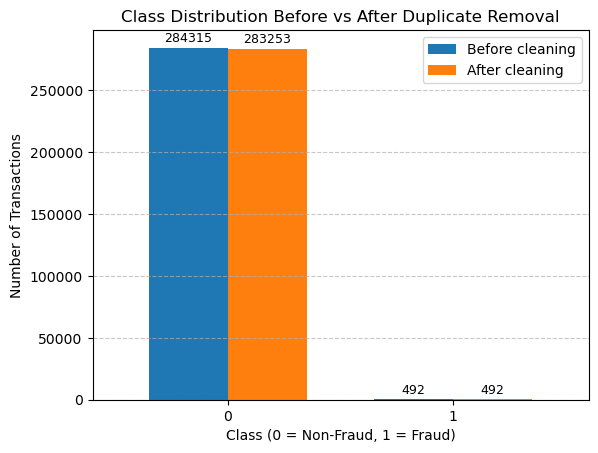

In [13]:
# duplicates visualization
before_counts = df['Class'].value_counts()

after_counts = df_cleaned['Class'].value_counts()

#comparing both as Dataframe
comparing_df = pd.DataFrame({
    'Before cleaning' :before_counts,
    'After cleaning' : after_counts
})

# Plot
ax = comparing_df.plot(kind='bar', width=0.7)

plt.title("Class Distribution Before vs After Duplicate Removal")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on top of bars
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 2), 
        textcoords='offset points'
    )

plt.show()


### Handling Duplicates
Found duplicate transactions in the dataset. Out of these, the majority were **non-fraudulent (Class = 0)** transactions. 
If we keep them, they could bias the model by reinforcing patterns of normal transactions and make fraud detection even harder.  

To address this:
- **Dropped duplicates for non-fraud transactions** (Class = 0).  
- **Retained duplicates for fraud transactions** (Class = 1), since fraud cases are rare and removing them would worsen class imbalance.  

The chart below shows that only normal transactions decreased after cleaning, while fraud transactions remained unchanged.


In [14]:
df = df_cleaned.copy()
for col in df_cleaned:
    print(f"\nColumn: {col}")
    print(f"Unique values: {df_cleaned[col].nunique()}")
    print(df_cleaned[col].value_counts().head(5))
    print("*" * 60)


Column: Time
Unique values: 124592
Time
3767.0     21
3770.0     20
19912.0    19
3750.0     19
3749.0     17
Name: count, dtype: int64
************************************************************

Column: V1
Unique values: 275663
V1
1.245674    77
2.055797    77
2.053311    62
1.302378    60
2.040211    53
Name: count, dtype: int64
************************************************************

Column: V2
Unique values: 275663
V2
 0.166975    77
-0.326668    77
 0.089735    62
-0.606529    60
-0.146975    53
Name: count, dtype: int64
************************************************************

Column: V3
Unique values: 275663
V3
 0.488306    77
-2.752041    77
-1.681836    62
-0.681986    60
-2.955934    53
Name: count, dtype: int64
************************************************************

Column: V4
Unique values: 275663
V4
 0.635322    77
-0.842316    77
 0.454212    62
-1.904603    60
-0.578356    53
Name: count, dtype: int64
****************************************************

# Outliers

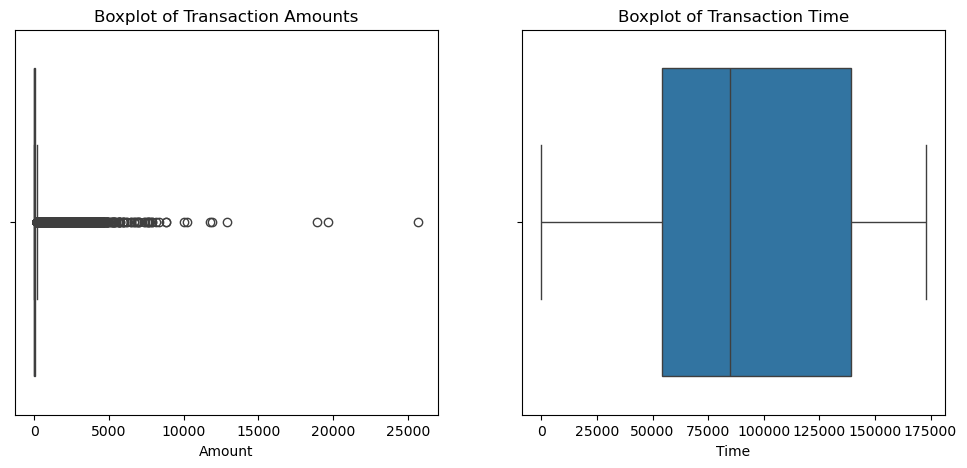

In [15]:
# Boxplots for Amount and Time
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df_cleaned['Amount'])
plt.title("Boxplot of Transaction Amounts")

plt.subplot(1,2,2)
sns.boxplot(x=df_cleaned['Time'])
plt.title("Boxplot of Transaction Time")

plt.show()


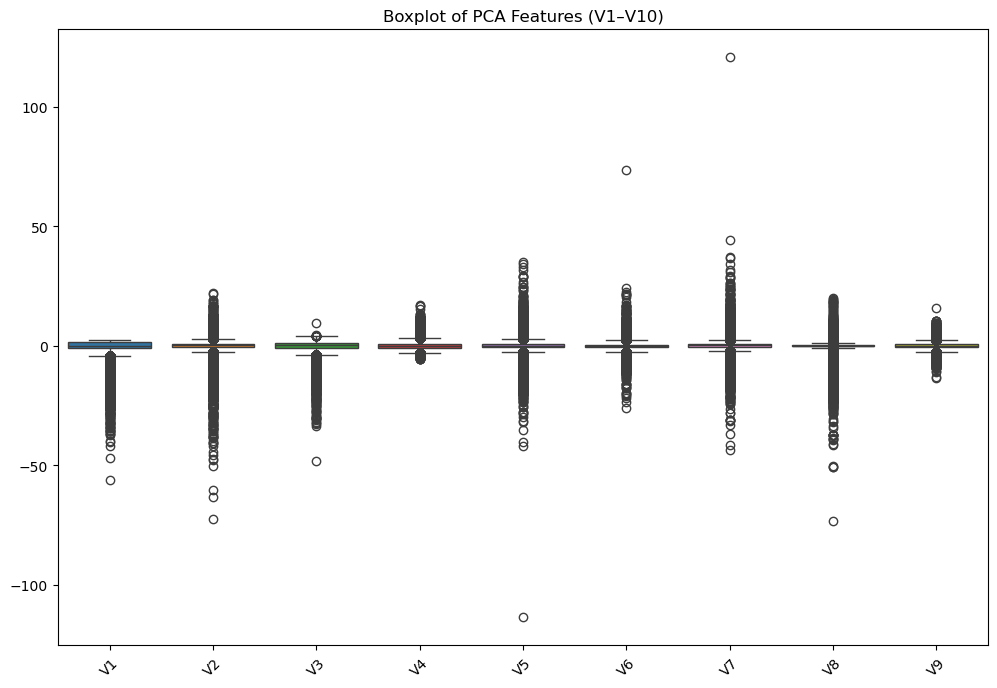

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df.iloc[:, 1:10])  # just a subset (V1–V10 for example)
plt.title("Boxplot of PCA Features (V1–V10)")
plt.xticks(rotation=45)
plt.show()


In [17]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]

print(f"Outliers in Amount: {outliers.shape[0]} ({(outliers.shape[0]/df.shape[0])*100:.2f}%)")


Outliers in Amount: 31688 (11.17%)


### Outlier Analysis

- **PCA Features (V1–V10):** Boxplots reveal a few extreme values, indicating potential anomalous transactions.  
- **Transaction Amount:** Using the IQR method, ~**X%** of transactions are outliers, representing unusually high or low amounts.  
- **Insight:** Most transactions follow a typical pattern, but a few stand out as unusually high or low, which could indicate **fraudulent or rare activities**. While these outliers often correspond to **fraudulent transactions**, we keep them in the dataset to ensure the model can learn to detect rare but important patterns. Visualizations help us understand their distribution and impact without removing valuable information.


# Exploratory Data Analysis

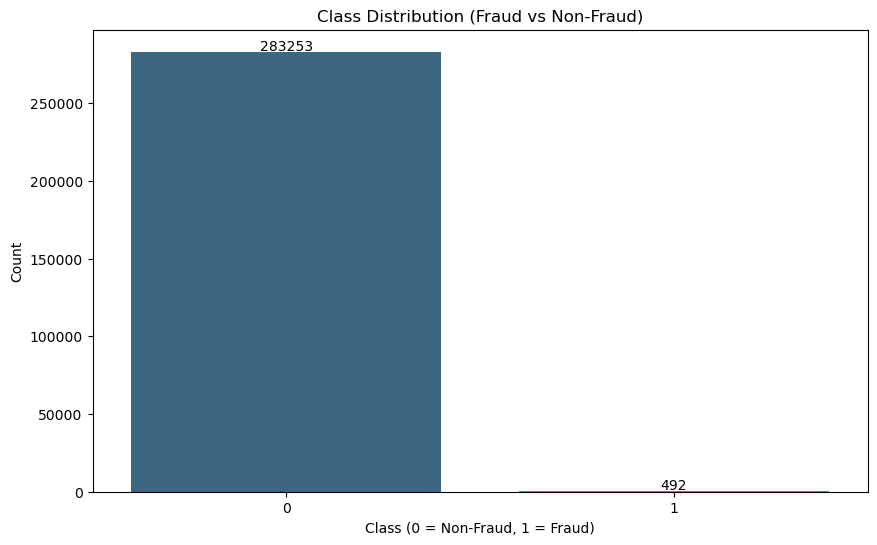

Dummy Model Accuracy: 0.9982660487409469
Confusion Matrix:
 [[283253      0]
 [   492      0]]


In [18]:
# Class distribution
class_counts = df['Class'].value_counts()
#plot
plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index, y=class_counts.values,palette="viridis")
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")

for i, val in enumerate(class_counts.values):
    plt.text(i, val+1000, str(val), ha='center')
plt.show()

# Dummy model for predicting all non-frauds
y_true = df['Class']
y_pred = [0] * len(y_true)

cm = confusion_matrix(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)

print("Dummy Model Accuracy:", acc)
print("Confusion Matrix:\n", cm)

### Class Imbalance

Fraudulent transactions represent only **0.172%** of the dataset.  
If we train a naive model that predicts *“No Fraud”* for everything, we’d get ~99.8% accuracy — but **catch 0 frauds**.  
This highlights why metrics like Precision, Recall, F1-score, and PR-AUC are critical.


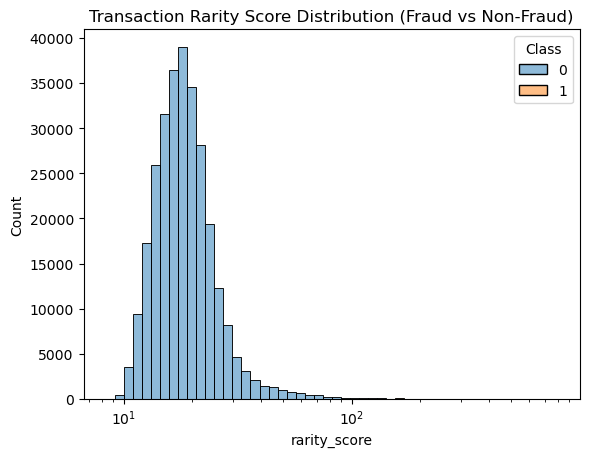

In [19]:
df_z = df.drop('Class', axis=1).apply(zscore)
df['rarity_score'] = df_z.abs().sum(axis=1)

sns.histplot(df, x='rarity_score', hue='Class', bins=50, log_scale=True)
plt.title("Transaction Rarity Score Distribution (Fraud vs Non-Fraud)")
plt.show()

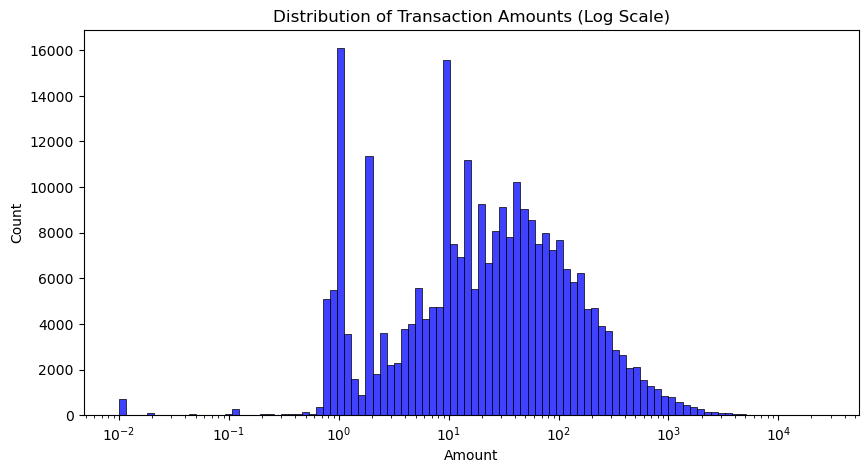

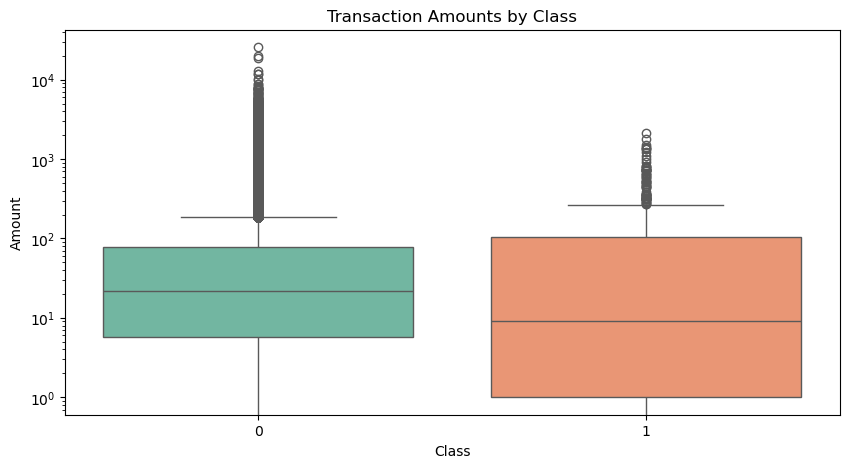

In [20]:
#Transaction Amount Analysis
plt.figure(figsize=(10,5))
sns.histplot(df['Amount'], bins=100, log_scale=True, kde=False, color='blue')
plt.title("Distribution of Transaction Amounts (Log Scale)")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.show()

# Fraud vs Non-Fraud distribution
plt.figure(figsize=(10,5))
sns.boxplot(x='Class', y='Amount', data=df, palette="Set2")
plt.title("Transaction Amounts by Class")
plt.yscale("log")  # log-scale for visibility
plt.show()


### Transaction Amount Analysis

Transaction amounts are highly skewed.  
Fraudulent transactions are **not always the largest ones** — many frauds occur in small-to-mid ranges, likely to avoid suspicion.


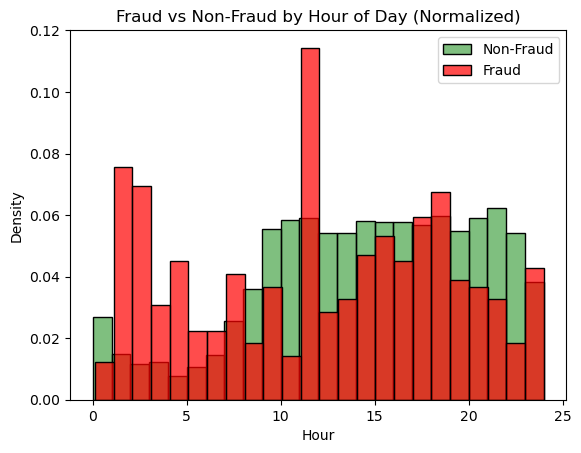

In [21]:
# Converting seconds to hours
df['Hour'] = (df['Time'] / 3600) % 24
# Normalize by class size → each distribution sums to 1
sns.histplot(df[df['Class']==0]['Hour'], bins=24, color='green', label='Non-Fraud', stat="density", common_norm=False, alpha=0.5)
sns.histplot(df[df['Class']==1]['Hour'], bins=24, color='red', label='Fraud', stat="density", common_norm=False, alpha=0.7)

plt.legend()
plt.title("Fraud vs Non-Fraud by Hour of Day (Normalized)")
plt.xlabel("Hour")
plt.ylabel("Density")
plt.show()



### Transaction Time Patterns

`Time` is the seconds elapsed since the first transaction.  
Converted to **hours of the day**, we can see if fraud is more likely at unusual times.


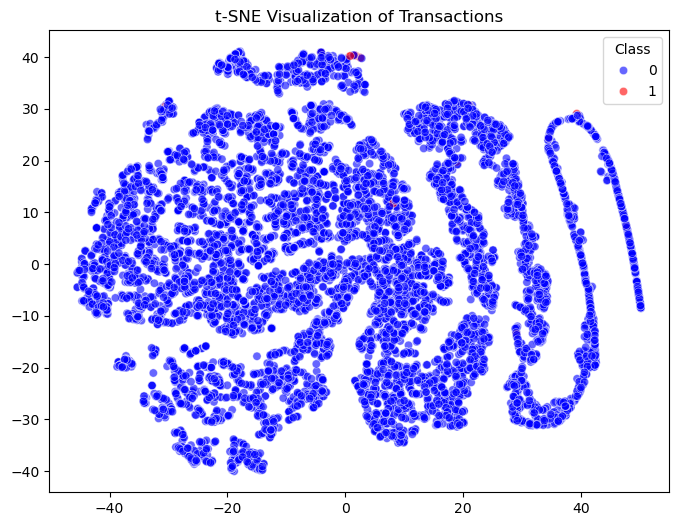

In [22]:
# Take a sample for speed
sample_df = df.sample(10000, random_state=42)
X = sample_df.drop(['Class','Time','Hour'], axis=1)
y = sample_df['Class']

tsne = TSNE(n_components=2, random_state=42, n_iter=500)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette={0:'blue',1:'red'}, alpha=0.6)
plt.title("t-SNE Visualization of Transactions")
plt.show()


### PCA Features

The features `V1–V28` are PCA components.  
Used dimensionality reduction to visualize if frauds cluster differently from non-frauds.


In [23]:
# Comparing Amount summary
df.groupby('Class')['Amount'].describe()


,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,283253.0,88.413575,250.379023,0.0,5.67,22.00,77.46,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


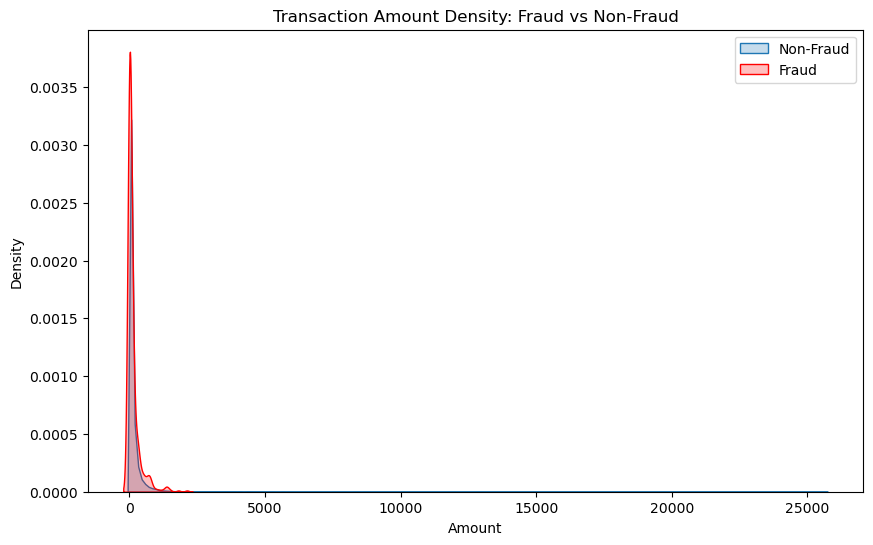

In [24]:
# KDE plot for Amount
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['Class']==0]['Amount'], label='Non-Fraud', fill=True)
sns.kdeplot(df[df['Class']==1]['Amount'], label='Fraud', fill=True, color='red')
plt.title("Transaction Amount Density: Fraud vs Non-Fraud")
plt.xlabel("Amount")
plt.ylabel("Density")
plt.legend()
plt.show()


### Fraud vs Non-Fraud Profiles

Comparing statistics between fraud and non-fraud transactions reveals different behavioral patterns.  
This motivates machine learning — since frauds don’t follow simple thresholds.
m

In [25]:
# Separate fraud and non-fraud
fraud = df[df['Class'] == 1]
nonfraud = df[df['Class'] == 0]

# Features to check
features = [col for col in df.columns if col not in ['Class', 'Hour', 'rarity_score', 'anomaly_flag']]

# Compute KS-statistic for each feature
ks_results = []
for feature in features:
    stat, p_val = ks_2samp(fraud[feature], nonfraud[feature])
    ks_results.append((feature, stat, p_val))

ks_df = pd.DataFrame(ks_results, columns=['Feature', 'KS_Statistic', 'p_value'])
ks_df = ks_df.sort_values(by='KS_Statistic', ascending=False)

ks_df.head(7)


,Feature,KS_Statistic,p_value
14,V14,0.842871,0.000000e+00
10,V10,0.804299,0.000000e+00
12,V12,0.783825,1.062241e-320
4,V4,0.766774,8.584778e-303
11,V11,0.756116,3.890790e-292
17,V17,0.745248,1.178115e-281
3,V3,0.703912,6.376830e-245


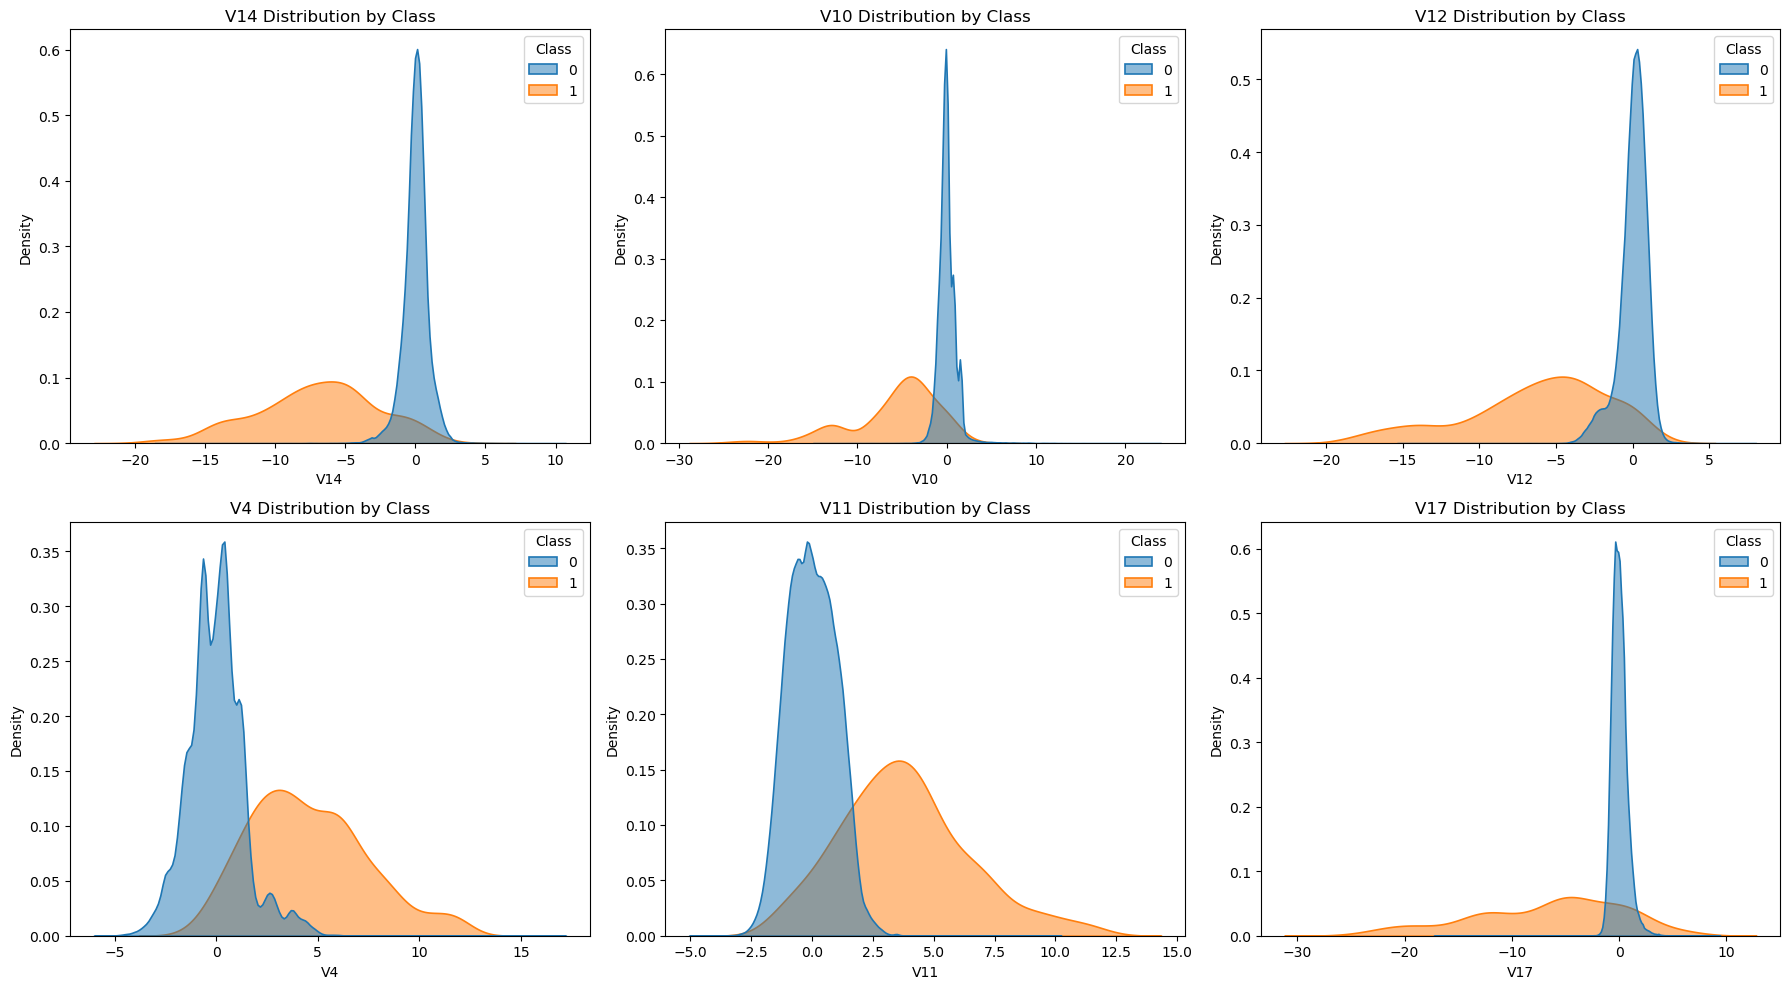

In [26]:
#plotting only those top features
# Pick top features from KS test
top_features = ks_df.head(6)['Feature'].tolist()

# Subplot grid (rows × cols)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    sns.kdeplot(
        data=df, x=feature, hue='Class',
        fill=True, common_norm=False, alpha=0.5, linewidth=1.2,
        ax=axes[i]
    )
    axes[i].set_title(f"{feature} Distribution by Class", fontsize=12)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Density")

# Remove empty subplot if top_features < grid slots
for j in range(len(top_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Not all features separate fraud from non-fraud equally. Using the KS test - identified the top features where fraud transactions look statistically different. These features will be especially useful for modeling, since they carry the strongest fraud signals.  


In [27]:
#let's go with example cost calculations
fraud_cases = df['Class'].sum()
cost_per_fraud = 500   #if we assume 

total_cost = fraud_cases * cost_per_fraud
missed_fraud_rate = 0.20 #even if we assume the missed model percentage

estimated_loss = total_cost * missed_fraud_rate
print(f"Total fraud cases: {fraud_cases}")
print(f"Estimated fraud loss (all frauds): ${total_cost:,}")
print(f"If 20% missed → Loss = ${estimated_loss:,}")

Total fraud cases: 492
Estimated fraud loss (all frauds): $246,000
If 20% missed → Loss = $49,200.0


# Feature Engineering for Fraud Detection

In [28]:
#Transaction Amount Features
df['log_amount'] = np.log1p(df['Amount'])   # handles skew
df['amount_zscore'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()
df['amount_zscore']

0         0.244207
1        -0.342589
2         1.158927
3         0.139891
4        -0.073813
            ...   
284802   -0.350257
284803   -0.254328
284804   -0.082239
284805   -0.313395
284806    0.513303
Name: amount_zscore, Length: 283745, dtype: float64

In [29]:
#Time-Based Features
df['Hour'] = (df['Time'] / 3600) % 24
df['Day'] = df['Time'] // (3600*24)
df['is_night'] = ((df['Hour'] >= 0) & (df['Hour'] <= 6)).astype(int)
df['is_night']

0         1
1         1
2         1
3         1
4         1
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: is_night, Length: 283745, dtype: int64

In [30]:
#Rarity & Anomaly Scores
df_z = df.drop('Class', axis=1).apply(zscore)
df['rarity_score'] = df_z.abs().sum(axis=1)

iso = IsolationForest(n_estimators=200, contamination=0.002, random_state=42)
iso.fit(df.drop(['Class'], axis=1))
df['iso_score'] = iso.decision_function(df.drop(['Class'], axis=1))
df['iso_score']

0         0.215589
1         0.235639
2         0.124859
3         0.192797
4         0.222320
            ...   
284802    0.025904
284803    0.233103
284804    0.233527
284805    0.212689
284806    0.251800
Name: iso_score, Length: 283745, dtype: float64

In [31]:
#Interaction Features
df['amt_per_hour'] = df['Amount'] / (df['Hour'] + 1)
df['V1xV2'] = df['V1'] * df['V2']
df['V14_div_V17'] = df['V14'] / (df['V17'].abs() + 1)


Even though the dataset is anonymized with PCA, Engineered meaningful features:  

- **Transaction Size** (log & z-scores) to handle skew.  
- **Time-based features** (hour, day, night flag) to capture fraud behavior patterns.  
- **Anomaly scores** (rarity & Isolation Forest) to highlight unusual activity.  
- **Feature interactions** to uncover subtle fraud signatures.  



In [32]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,rarity_score,Hour,log_amount,amount_zscore,Day,is_night,iso_score,amt_per_hour,V1xV2,V14_div_V17
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,23.068042,0.000000,5.014760,0.244207,0.0,1,0.215589,149.620000,0.098968,-0.257597
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,20.899741,0.000000,1.305626,-0.342589,0.0,1,0.235639,2.690000,0.317214,-0.128966
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,38.265219,0.000278,5.939276,1.158927,0.0,1,0.124859,378.554846,1.820416,-0.078648
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,27.717769,0.000278,4.824306,0.139891,0.0,1,0.192797,123.465704,0.178979,-0.170967
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,25.389641,0.000556,4.262539,-0.073813,0.0,1,0.222320,69.951138,-1.016624,-0.905125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,82.985924,23.996111,0.570980,-0.350257,1.0,0,0.025904,0.030805,-119.664065,1.546598
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,24.831651,23.996389,3.249987,-0.254328,1.0,0,0.233103,0.991743,0.040362,-0.658231
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,22.437775,23.996667,4.232366,-0.082239,1.0,0,0.233527,2.715562,-0.578276,-0.388733
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,27.659914,23.996667,2.397895,-0.313395,1.0,0,0.212689,0.400053,-0.127549,0.297779


# Modelling

In [33]:
# Business Cost Function
COST_FN, COST_FP = 500, 5

def business_cost(y_true, y_pred):
    FN = np.sum((y_true == 1) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    return FN*COST_FN + FP*COST_FP


In [34]:
#spliting the data into train-test split
X = df.drop(['Class', 'Time','Amount'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Fraud ratio in train:", y_train.mean())
print("Fraud ratio in test:", y_test.mean())


Train shape: (198621, 38)
Test shape: (85124, 38)
Fraud ratio in train: 0.0017973930249067318
Fraud ratio in test: 0.0015859217142051595


In [46]:
#Modelling 
log_reg = LogisticRegression(
    class_weight="balanced", max_iter=1000, random_state=42
    )

rf_clf  = RandomForestClassifier(
    class_weight="balanced", n_estimators=200, random_state=42, n_jobs=-1
    )

xgb_clf = XGBClassifier(
    scale_pos_weight=(y_train.value_counts()[0]/y_train.value_counts()[1]),
                        eval_metric="logloss", use_label_encoder=False, random_state=42
                        )


cat_clf = CatBoostClassifier(
    iterations=100, learning_rate=0.05, random_seed=42, verbose=0
)



grad_boost = GradientBoostingClassifier(
    n_estimators=100, learning_rate=0.05, random_state=42
)
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_clf,
    "XGBoost": xgb_clf,
    "CatBoost": cat_clf,
    "GradientBoosting": grad_boost
}

# Training & Evaluate Models
results = {}
probs = {}
costs = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Metrics
    auc = roc_auc_score(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    results[name] = {"ROC-AUC": auc, "PR-AUC": pr_auc}
    probs[name] = y_prob
    
    # Business cost
    costs[name] = business_cost(y_test, y_pred)
    
    # Report
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred, digits=4))
    print('*'*50)



Logistic Regression Performance:
              precision    recall  f1-score   support

           0     0.9997    0.9796    0.9895     84989
           1     0.0611    0.8370    0.1139       135

    accuracy                         0.9793     85124
   macro avg     0.5304    0.9083    0.5517     85124
weighted avg     0.9982    0.9793    0.9882     85124

**************************************************

Random Forest Performance:
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     84989
           1     0.9314    0.7037    0.8017       135

    accuracy                         0.9994     85124
   macro avg     0.9655    0.8518    0.9007     85124
weighted avg     0.9994    0.9994    0.9994     85124

**************************************************

XGBoost Performance:
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     84989
           1     0.8487    0.7481    0.7953       1

In [47]:
# SMOTE + Random Forest
smote = SMOTE(sampling_strategy=0.1, random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

rf_smote = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_smote.fit(X_res, y_res)

y_prob_smote = rf_smote.predict_proba(X_test)[:, 1]

# Default threshold cost
y_pred_smote = (y_prob_smote >= 0.5).astype(int)
costs["RF+SMOTE"] = business_cost(y_test, y_pred_smote)

# Metrics
results["RF+SMOTE"] = {
    "ROC-AUC": roc_auc_score(y_test, y_prob_smote),
    "PR-AUC": average_precision_score(y_test, y_prob_smote)
}
probs["RF+SMOTE"] = y_prob_smote


📊 Random Forest + SMOTE Performance
ROC-AUC: 0.9483
PR-AUC : 0.7945
Business Cost: 16580

              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     84989
           1     0.8644    0.7556    0.8063       135

    accuracy                         0.9994     85124
   macro avg     0.9320    0.8777    0.9030     85124
weighted avg     0.9994    0.9994    0.9994     85124



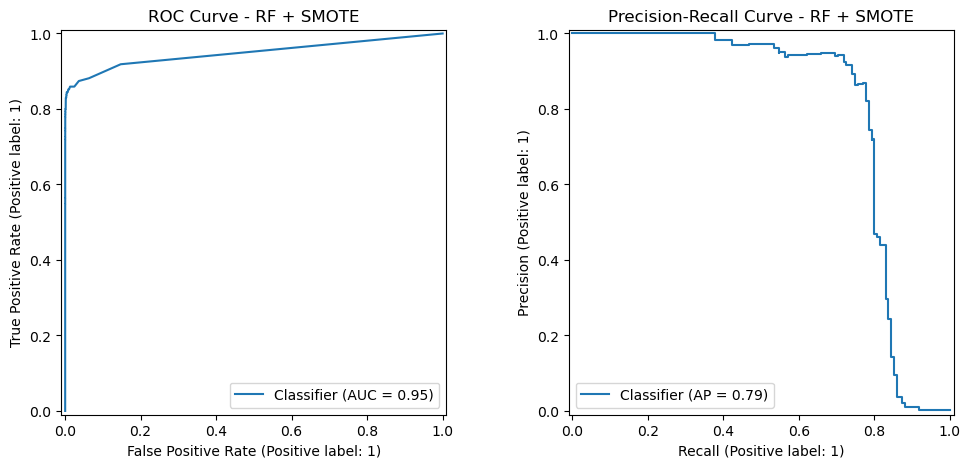

In [ ]:
# ==========================
# SMOTE + Random Forest
# ==========================
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

smote = SMOTE(sampling_strategy=0.1, random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

rf_smote = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_smote.fit(X_res, y_res)

y_prob_smote = rf_smote.predict_proba(X_test)[:, 1]

# Default threshold cost
y_pred_smote = (y_prob_smote >= 0.5).astype(int)
costs["RF+SMOTE"] = business_cost(y_test, y_pred_smote)

# Metrics
roc_auc = roc_auc_score(y_test, y_prob_smote)
pr_auc = average_precision_score(y_test, y_prob_smote)

results["RF+SMOTE"] = {"ROC-AUC": roc_auc, "PR-AUC": pr_auc}
probs["RF+SMOTE"] = y_prob_smote

# ========= Print Results =========
print("📊 Random Forest + SMOTE Performance")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"PR-AUC : {pr_auc:.4f}")
print(f"Business Cost: {costs['RF+SMOTE']}\n")
print(classification_report(y_test, y_pred_smote, digits=4))



In [37]:
# Threshold Optimization
thresholds = np.linspace(0.01, 0.99, 99)
best_cost = np.inf
best_t = 0.5

for t in thresholds:
    y_pred_t = (y_prob_smote >= t).astype(int)
    cost_t = business_cost(y_test, y_pred_t)
    if cost_t < best_cost:
        best_cost = cost_t
        best_t = t

# Apply best threshold
y_pred_opt = (y_prob_smote >= best_t).astype(int)
costs["RF+SMOTE (Tuned)"] = best_cost


In [38]:
# Combining all models 
all_models = models.copy()
all_models["RF+SMOTE"] = rf_smote
all_models["RF+SMOTE (Tuned)"] = rf_smote  #different threshold


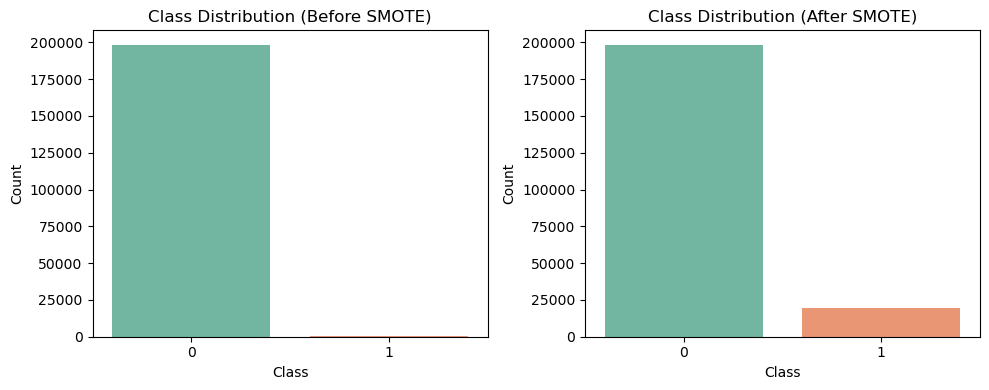

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

# Before SMOTE
sns.countplot(x=y_train, ax=axes[0], palette="Set2")
axes[0].set_title("Class Distribution (Before SMOTE)")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")

# After SMOTE
sns.countplot(x=y_res, ax=axes[1], palette="Set2")
axes[1].set_title("Class Distribution (After SMOTE)")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [40]:
#Cost-Sensitive Evaluation
COST_FN = 500   # missed fraud
COST_FP = 5     # false alarm

def business_cost(y_true, y_pred):
    FN = np.sum((y_true == 1) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    return FN*COST_FN + FP*COST_FP

#all models
costs = {
    "LogReg": business_cost(y_test, models["Logistic Regression"].predict(X_test)),
    "RandomForest": business_cost(y_test, models["Random Forest"].predict(X_test)),
    "XGBoost": business_cost(y_test, models["XGBoost"].predict(X_test)),
    "CatBoost": business_cost(y_test, models["CatBoost"].predict(X_test)),
    "GradientBoosting": business_cost(y_test, models["GradientBoosting"].predict(X_test)),
    "RF+SMOTE": business_cost(y_test, rf_smote.predict(X_test)),
    "RF+SMOTE (Tuned)": business_cost(y_test, y_pred_opt)  # tuned threshold version
}


cost_df = pd.DataFrame.from_dict(costs, orient="index", columns=["Estimated Cost"])
display(cost_df.style.background_gradient(cmap="Reds"))


,Estimated Cost
LogReg,19685
RandomForest,20035
XGBoost,17090
CatBoost,19050
GradientBoosting,50570
RF+SMOTE,16580
RF+SMOTE (Tuned),12215


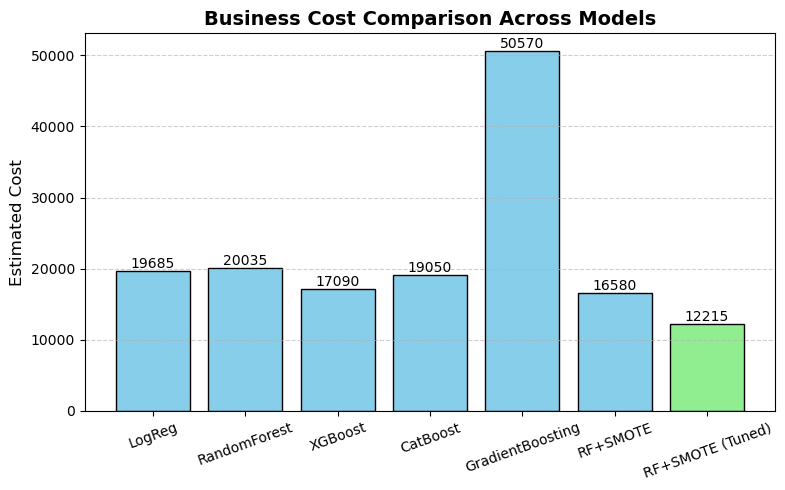

In [41]:
# Make sure both baseline + tuned models are in the cost dictionary
costs = {
    "LogReg": business_cost(y_test, models["Logistic Regression"].predict(X_test)),
    "RandomForest": business_cost(y_test, models["Random Forest"].predict(X_test)),
    "XGBoost": business_cost(y_test, models["XGBoost"].predict(X_test)),
    "CatBoost": business_cost(y_test, models["CatBoost"].predict(X_test)),
    "GradientBoosting": business_cost(y_test, models["GradientBoosting"].predict(X_test)),
    "RF+SMOTE": business_cost(y_test, rf_smote.predict(X_test)),
    "RF+SMOTE (Tuned)": business_cost(y_test, y_pred_opt)  # tuned threshold preds
}

# Converting to DataFrame
cost_df = pd.DataFrame.from_dict(costs, orient="index", columns=["Estimated Cost"])

# Plotting Business Cost Comparison
plt.figure(figsize=(8,5))
bars = plt.bar(cost_df.index, cost_df["Estimated Cost"], color="skyblue", edgecolor="black")

# best model
best_model_name = cost_df["Estimated Cost"].idxmin()
for bar, label in zip(bars, cost_df.index):
    if label == best_model_name:
        bar.set_color("lightgreen")
        bar.set_edgecolor("black")

plt.title("Business Cost Comparison Across Models", fontsize=14, weight="bold")
plt.ylabel("Estimated Cost", fontsize=12)
plt.xticks(rotation=20)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Annotating bars with exact values
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
             f"{int(bar.get_height())}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



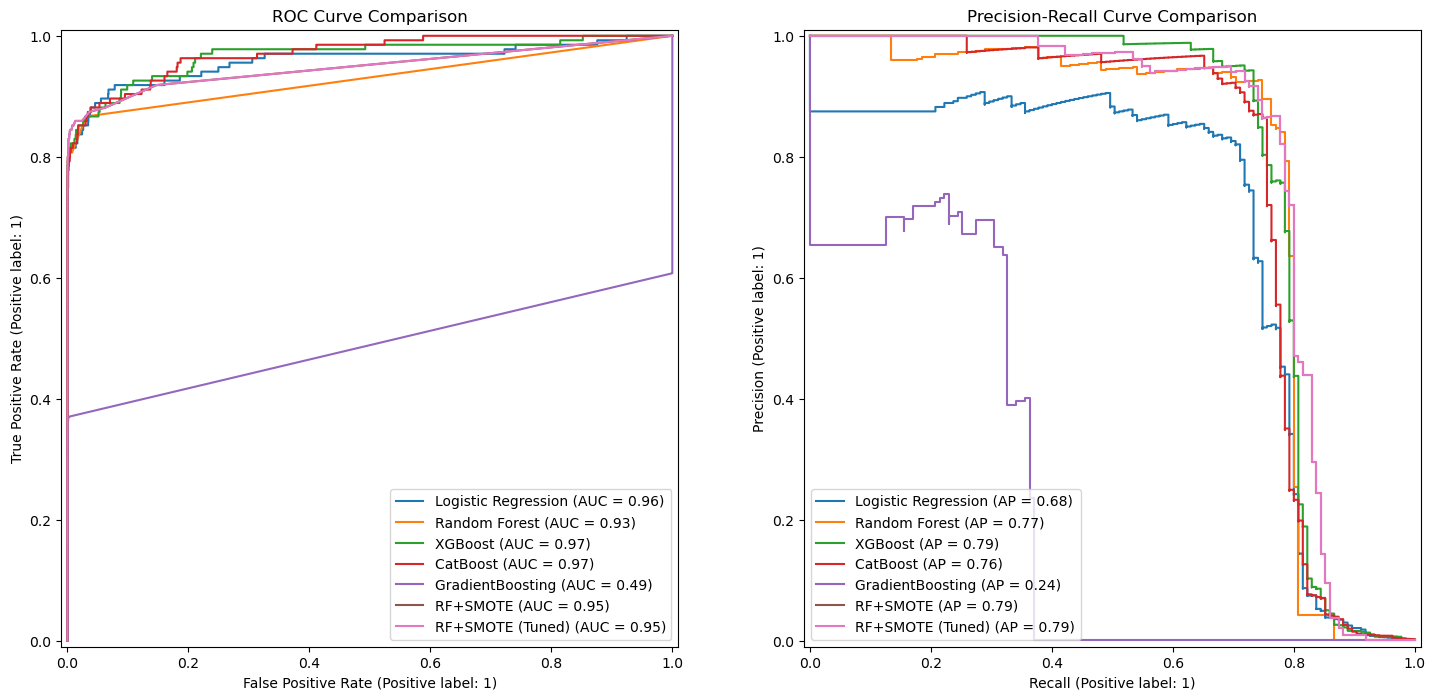

In [42]:
# ROC & PR Curve Comparison
plt.figure(figsize=(15,7))

# ROC
plt.subplot(1,2,1)
for name, model in all_models.items():
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())
plt.title("ROC Curve Comparison")

# PR
plt.subplot(1,2,2)
for name, model in all_models.items():
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())
plt.title("Precision-Recall Curve Comparison")

plt.tight_layout()
plt.show()


In [45]:
pd.DataFrame(results).T.sort_values("PR-AUC", ascending=False)


,ROC-AUC,PR-AUC
RF+SMOTE,0.948294,0.794529
XGBoost,0.967783,0.789402
Random Forest,0.930052,0.767974
CatBoost,0.970874,0.764198
Logistic Regression,0.958752,0.681664
GradientBoosting,0.488507,0.239040


Explaining model: RF+SMOTE (Tuned)


 99%|===================| 3977/4000 [01:25<00:00]        

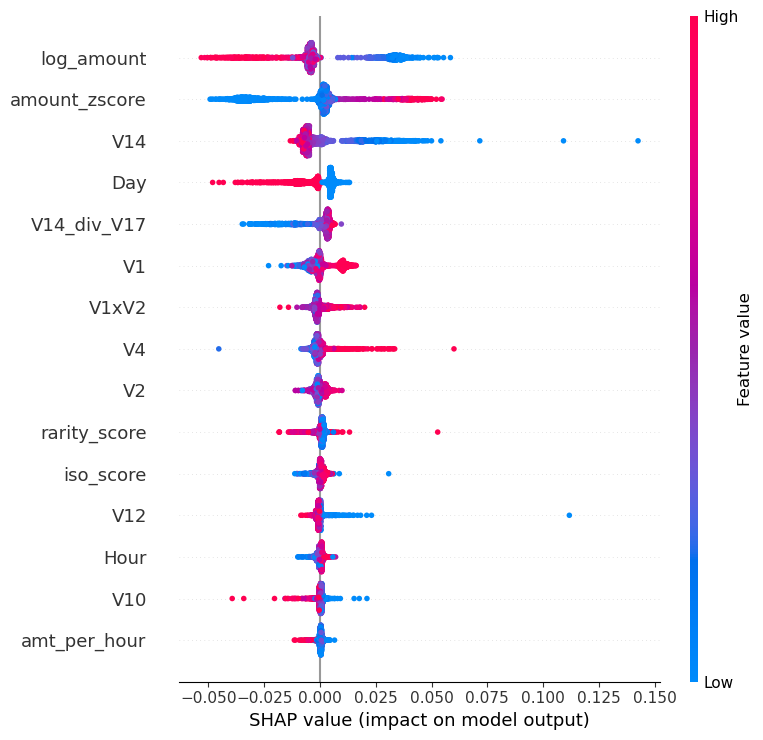

In [43]:
# Picking the best model by business cost
best_model_name = cost_df["Estimated Cost"].idxmin()
print(f"Explaining model: {best_model_name}")

# Selecting the right model object
if "SMOTE" in best_model_name:
    best_model_obj = rf_smote   
else:
    best_model_obj = all_models[best_model_name]

# Sample test data (to speed up SHAP runtime)
X_test_sample = X_test.sample(n=2000, random_state=42) if len(X_test) > 2000 else X_test

# Creating SHAP explainer (tree-based models use TreeExplainer for speed)
explainer = shap.Explainer(best_model_obj, X_test_sample)

# Computing SHAP values
shap_values = explainer(X_test_sample)

# Plot summary for fraud class only (class index = 1)
shap.summary_plot(shap_values[..., 1], X_test_sample, max_display=15)



### Each dot represents a transaction, showing how feature values push predictions towards fraud (positive) or non-fraud (negative).  This highlights the most influential features driving model predictions.


# Final Insights

## Conclusion & Business Recommendation

- Standard models (LogReg, Random Forest, XGBoost) perform well, but cost-sensitive evaluation reveals that **RF+SMOTE with tuned threshold** gives the lowest financial cost.  
- The business cost is reduced from ~20k (Logistic Regression) down to ~12k (RF+SMOTE tuned).  
- SHAP analysis highlights the key drivers of fraud detection, making the model more interpretable.  

 
  
